Evaluating model on the test dataset...
23/23 ━━━━━━━━━━━━━━━━━━━━ 11s 457ms/step - accuracy: 0.9007 - loss: 0.2458

Test Accuracy: 0.9007 (90.07%)
Test Loss: 0.2458

Generating predictions for confusion matrix...
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 424ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 417ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 406ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 421ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 410ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 389ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 416ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 419ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 389ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 408ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step
1/1 ━━━━━

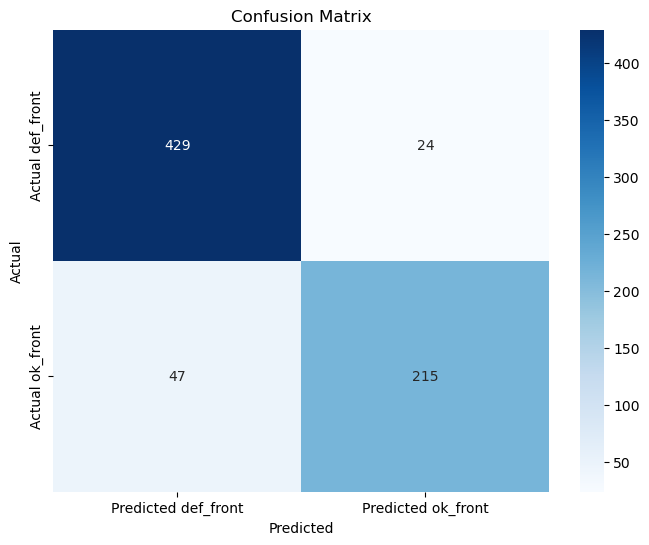

In [ ]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns


print("Evaluating model on the test dataset...")


loss, accuracy = model.evaluate(test_ds)

print(f"\nTest Accuracy: {accuracy:.4f} ({(accuracy * 100):.2f}%)")
print(f"Test Loss: {loss:.4f}")



print("\nGenerating predictions for confusion matrix...")

predictions = []


labels = []


for images, lbls in test_ds:
    
    batch_predictions = model.predict(images)
    
    
    batch_predictions = (batch_predictions > 0.5).astype(int).flatten()
    
    predictions.extend(batch_predictions)
    labels.extend(lbls.numpy())

print("\n--- Classification Report ---")

print(classification_report(labels, predictions, target_names=class_names))

print("\n--- Confusion Matrix ---")
cm = confusion_matrix(labels, predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=[f"Predicted {class_names[0]}", f"Predicted {class_names[1]}"],
            yticklabels=[f"Actual {class_names[0]}", f"Actual {class_names[1]}"])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

C:\Users\human\AppData\Local\Temp\ipykernel_36800\3418168419.py:28: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(input_shape=input_shape,


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential (Sequential)         │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ true_divide (TrueDivide)        │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ subtract (Subtract)             │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_224            │ (None, 6, 6, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │         1,281 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,259,265 (8.62 MB)

 Trainable params: 1,281 (5.00 KB)

 Non-trainable params: 2,257,984 (8.61 MB)


Starting model training...
Epoch 1/10
166/166 ━━━━━━━━━━━━━━━━━━━━ 102s 490ms/step - accuracy: 0.6077 - loss: 0.6712 - val_accuracy: 0.7956 - val_loss: 0.5249
Epoch 2/10
166/166 ━━━━━━━━━━━━━━━━━━━━ 77s 466ms/step - accuracy: 0.7322 - loss: 0.5317 - val_accuracy: 0.8228 - val_loss: 0.4483
Epoch 3/10
166/166 ━━━━━━━━━━━━━━━━━━━━ 83s 501ms/step - accuracy: 0.7980 - loss: 0.4518 - val_accuracy: 0.8484 - val_loss: 0.3933
Epoch 4/10
166/166 ━━━━━━━━━━━━━━━━━━━━ 82s 493ms/step - accuracy: 0.8355 - loss: 0.4035 - val_accuracy: 0.8650 - val_loss: 0.3579
Epoch 5/10
166/166 ━━━━━━━━━━━━━━━━━━━━ 96s 578ms/step - accuracy: 0.8543 - loss: 0.3614 - val_accuracy: 0.8703 - val_loss: 0.3303
Epoch 6/10
166/166 ━━━━━━━━━━━━━━━━━━━━ 92s 557ms/step - accuracy: 0.8707 - loss: 0.3320 - val_accuracy: 0.8801 - val_loss: 0.3050
Epoch 7/10
166/166 ━━━━━━━━━━━━━━━━━━━━ 93s 558ms/step - accuracy: 0.8832 - loss: 0.3152 - val_accuracy: 0.8899 - val_loss: 0.2870
Epoch 8/10
166/166 ━━━━━━━━━━━━━━━━━━━━ 94s 568ms/step

Model training complete.


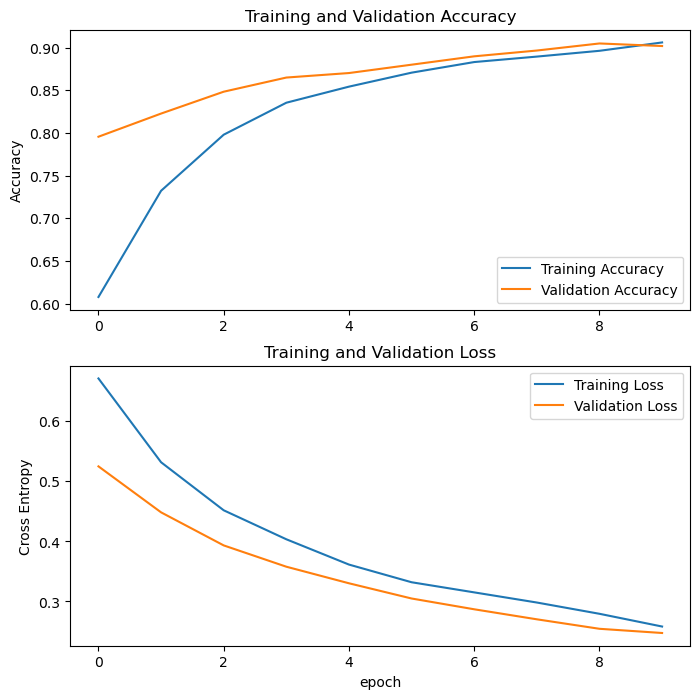

In [ ]:
import numpy as np
from tensorflow.keras import layers, models
from tensorflow.keras.applications import MobileNetV2


AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)


data_augmentation = tf.keras.Sequential(
  [
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
  ]
)


input_shape = (IMG_HEIGHT, IMG_WIDTH, 3)


base_model = MobileNetV2(input_shape=input_shape,
                         include_top=False,
                         weights='imagenet')


base_model.trainable = False


inputs = tf.keras.Input(shape=input_shape)


x = data_augmentation(inputs)


x = tf.keras.applications.mobilenet_v2.preprocess_input(x)


x = base_model(x, training=False)


x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.2)(x) 


outputs = layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.Model(inputs, outputs)


model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])


model.summary()


print("\nStarting model training...")

EPOCHS = 10 
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=EPOCHS
)

print("Model training complete.")


model.save('casting_quality_model.h5')


acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

Found 6633 files belonging to 2 classes.
Using 5307 files for training.
Found 6633 files belonging to 2 classes.
Using 1326 files for validation.
Found 715 files belonging to 2 classes.
Classes found: ['def_front', 'ok_front']


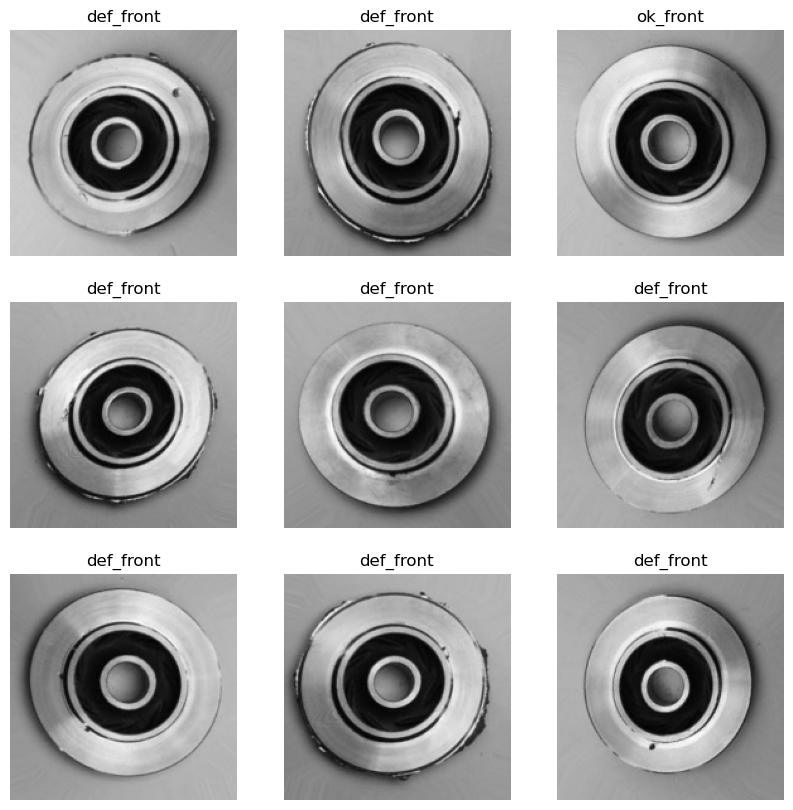

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import os


data_dir = 'casting_data/casting_data' 


IMG_HEIGHT = 180
IMG_WIDTH = 180
BATCH_SIZE = 32


try:
    train_ds = tf.keras.utils.image_dataset_from_directory(
      os.path.join(data_dir, 'train'),
      validation_split=0.2,
      subset="training",
      seed=123,
      image_size=(IMG_HEIGHT, IMG_WIDTH),
      batch_size=BATCH_SIZE)

    
    val_ds = tf.keras.utils.image_dataset_from_directory(
      os.path.join(data_dir, 'train'),
      validation_split=0.2,
      subset="validation",
      seed=123,
      image_size=(IMG_HEIGHT, IMG_WIDTH),
      batch_size=BATCH_SIZE)


    test_ds = tf.keras.utils.image_dataset_from_directory(
      os.path.join(data_dir, 'test'),
      image_size=(IMG_HEIGHT, IMG_WIDTH),
      batch_size=BATCH_SIZE)

   
    class_names = train_ds.class_names
    print(f"Classes found: {class_names}")

   
    plt.figure(figsize=(10, 10))
    for images, labels in train_ds.take(1):
      for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")
    plt.show()

except FileNotFoundError:
    print(f"ERROR: Still can't find the directory at {os.path.join(data_dir, 'train')}")
    print("Please double-check that your notebook is saved in the 'DATA' folder.")